In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("./data/trd_timeline.csv", low_memory=False)


In [243]:
features = [
    'term', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_avg',
    'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'acc_now_delinq', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
    'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'total_cu_tl', 'avg_cur_bal',
    'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mort_acc',
    'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
    'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'pct_tl_nvr_dlq',
    'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
    'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
    'home_ownership_MORTGAGE', "home_ownership_NONE", "home_ownership_OTHER", "home_ownership_OWN", "home_ownership_RENT", "verification_status_Source Verified", "verification_status_Verified", "loan_status"
]

In [244]:
df = df[features]

In [245]:
# loan_status : 부도 여부, 타겟 변수
# non-default = 0, default = 1
# 'Fully Paid'와 'Charged Off'가 아닌 행 제거
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['loan_status'] = np.where(df['loan_status'] == 'Fully Paid', 0, 1)


In [246]:
# 각 컬럼의 결측치 개수 계산
missing_counts = df.isnull().sum()

# 결측치가 있는 컬럼만 선택
missing_counts = missing_counts[missing_counts > 0]

# 결측치 비율 계산 (전체 행 수에 대한 비율)
missing_ratios = missing_counts / len(df)

# 결측치 개수와 비율을 하나의 DataFrame으로 생성한 후, 내림차순 정렬
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Ratio': missing_ratios
}).sort_values(by='Missing Count', ascending=False)

missing_df

,Missing Count,Missing Ratio
il_util,593266,0.531654
mths_since_rcnt_il,525278,0.470726
all_util,507913,0.455165
total_cu_tl,507831,0.455091
total_bal_il,507831,0.455091
max_bal_bc,507831,0.455091
dti,645,0.000578
pub_rec_bankruptcies,439,0.000393
chargeoff_within_12_mths,38,0.000034
tax_liens,29,0.000026


In [247]:
# 40% 이상 결측치를 가지는 칼럼 drop
df = df.loc[:, (df.isnull().mean() < 0.4) | (df.columns == "loan_status")]

df.info()
# 현재 칼럼 수 : 44개
print("현재 행 개수:", df.shape[0])
# 현재 행 수 : 1115888개

<class 'pandas.core.frame.DataFrame'>
Index: 1115888 entries, 0 to 1755292
Data columns (total 44 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   term                                 1115888 non-null  float64
 1   emp_length                           1115888 non-null  float64
 2   annual_inc                           1115888 non-null  float64
 3   dti                                  1115243 non-null  float64
 4   delinq_2yrs                          1115888 non-null  float64
 5   fico_avg                             1115888 non-null  float64
 6   inq_last_6mths                       1115888 non-null  float64
 7   open_acc                             1115888 non-null  float64
 8   pub_rec                              1115888 non-null  float64
 9   revol_bal                            1115888 non-null  float64
 10  revol_util                           1115888 non-null  float64
 11  tot

In [248]:
df.head()

,term,emp_length,annual_inc,dti,delinq_2yrs,fico_avg,inq_last_6mths,open_acc,pub_rec,revol_bal,...,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,loan_status
0,36.0,2.0,45000.0,0.0867,1.0,757.0,0.0,14.0,0.0,3090.0,...,15000.0,56511.0,True,False,False,False,False,False,True,0
2,60.0,10.0,110000.0,0.3470,1.0,672.0,1.0,24.0,0.0,16909.0,...,20300.0,291465.0,True,False,False,False,False,False,True,1
5,36.0,-1.0,65000.0,0.1774,0.0,822.0,0.0,18.0,0.0,3881.0,...,59100.0,49339.0,True,False,False,False,False,False,False,1
6,36.0,5.0,50000.0,0.0699,0.0,702.0,0.0,7.0,2.0,6824.0,...,9300.0,11970.0,True,False,False,False,False,False,False,0
7,36.0,10.0,60000.0,0.2894,0.0,677.0,0.0,19.0,0.0,16626.0,...,11000.0,73090.0,True,False,False,False,False,True,False,0


In [249]:
df["loan_status"].value_counts()

loan_status
0    898522
1    217366
Name: count, dtype: int64

In [250]:
# 1. term: 36, 60 -> 이진 스케일링 (36: 0, 60: 1)
df['term'] = df['term'].apply(lambda x: 0 if x == 36 else 1 if x == 60 else x)

# 2. emp_length: (ordinal) 단순 Min-Max 스케일링  
df['emp_length'] = (df['emp_length'] - df['emp_length'].min()) / (df['emp_length'].max() - df['emp_length'].min())

# 3. annual_inc: 로그 후 Min-Max 스케일링
df['annual_inc'] = np.log1p(df['annual_inc'])
df['annual_inc'] = (df['annual_inc'] - df['annual_inc'].min()) / (df['annual_inc'].max() - df['annual_inc'].min())

# 4. dti: 로그 후 Min-Max 스케일링
df['dti'] = np.log1p(df['dti'])
df['dti'] = (df['dti'] - df['dti'].min()) / (df['dti'].max() - df['dti'].min())

# 5. delinq_2yrs: 이진화 (0이면 0, 그 외 1)
df['delinq_2yrs'] = (df['delinq_2yrs'] > 0).astype(int)

# 6. fico_avg: Min-Max 스케일링
df['fico_avg'] = (df['fico_avg'] - df['fico_avg'].min()) / (df['fico_avg'].max() - df['fico_avg'].min())

# 7. inq_last_6mths: 이진화 (0이면 0, 그 외 1)
df['inq_last_6mths'] = (df['inq_last_6mths'] > 0).astype(int)

# 8. open_acc: (ordinal) Min-Max 스케일링
df['open_acc'] = (df['open_acc'] - df['open_acc'].min()) / (df['open_acc'].max() - df['open_acc'].min())

# 9. pub_rec: 이진화 (0이면 0, 그 외 1)
df['pub_rec'] = (df['pub_rec'] > 0).astype(int)

# 10. revol_bal: 로그 후 Min-Max 스케일링
df['revol_bal'] = np.log1p(df['revol_bal'])
df['revol_bal'] = (df['revol_bal'] - df['revol_bal'].min()) / (df['revol_bal'].max() - df['revol_bal'].min())

# 11. revol_util: 로그 후 Min-Max 스케일링
df['revol_util'] = np.log1p(df['revol_util'])
df['revol_util'] = (df['revol_util'] - df['revol_util'].min()) / (df['revol_util'].max() - df['revol_util'].min())

# 12. total_acc: (ordinal) Min-Max 스케일링
df['total_acc'] = (df['total_acc'] - df['total_acc'].min()) / (df['total_acc'].max() - df['total_acc'].min())

# 13. acc_now_delinq: 이진화 (0이면 0, 그 외 1)
df['acc_now_delinq'] = (df['acc_now_delinq'] > 0).astype(int)

# 14. tot_cur_bal: 로그 후 Min-Max 스케일링
df['tot_cur_bal'] = np.log1p(df['tot_cur_bal'])
df['tot_cur_bal'] = (df['tot_cur_bal'] - df['tot_cur_bal'].min()) / (df['tot_cur_bal'].max() - df['tot_cur_bal'].min())

# 15. total_rev_hi_lim: Min-Max 스케일링 (로그 미적용)
df['total_rev_hi_lim'] = (df['total_rev_hi_lim'] - df['total_rev_hi_lim'].min()) / (df['total_rev_hi_lim'].max() - df['total_rev_hi_lim'].min())

# 16. avg_cur_bal: Min-Max 스케일링
df['avg_cur_bal'] = (df['avg_cur_bal'] - df['avg_cur_bal'].min()) / (df['avg_cur_bal'].max() - df['avg_cur_bal'].min())

# 17. bc_open_to_buy: 로그 후 Min-Max 스케일링
df['bc_open_to_buy'] = np.log1p(df['bc_open_to_buy'])
df['bc_open_to_buy'] = (df['bc_open_to_buy'] - df['bc_open_to_buy'].min()) / (df['bc_open_to_buy'].max() - df['bc_open_to_buy'].min())

# 18. bc_util: 로그 후 Min-Max 스케일링
df['bc_util'] = np.log1p(df['bc_util'])
df['bc_util'] = (df['bc_util'] - df['bc_util'].min()) / (df['bc_util'].max() - df['bc_util'].min())

# 19. chargeoff_within_12_mths: 이진화 (0이면 0, 그 외 1)
df['chargeoff_within_12_mths'] = (df['chargeoff_within_12_mths'] > 0).astype(int)

# 20. mort_acc: (ordinal) Min-Max 스케일링
df['mort_acc'] = (df['mort_acc'] - df['mort_acc'].min()) / (df['mort_acc'].max() - df['mort_acc'].min())

# 21. num_accts_ever_120_pd: 이진화 (0이면 0, 그 외 1)
df['num_accts_ever_120_pd'] = (df['num_accts_ever_120_pd'] > 0).astype(int)

# 22. num_actv_rev_tl: (ordinal) Min-Max 스케일링
df['num_actv_rev_tl'] = (df['num_actv_rev_tl'] - df['num_actv_rev_tl'].min()) / (df['num_actv_rev_tl'].max() - df['num_actv_rev_tl'].min())

# 23. num_bc_sats: (ordinal) Min-Max 스케일링
df['num_bc_sats'] = (df['num_bc_sats'] - df['num_bc_sats'].min()) / (df['num_bc_sats'].max() - df['num_bc_sats'].min())

# 24. num_bc_tl: (ordinal) Min-Max 스케일링
df['num_bc_tl'] = (df['num_bc_tl'] - df['num_bc_tl'].min()) / (df['num_bc_tl'].max() - df['num_bc_tl'].min())

# 25. num_op_rev_tl: (ordinal) Min-Max 스케일링
df['num_op_rev_tl'] = (df['num_op_rev_tl'] - df['num_op_rev_tl'].min()) / (df['num_op_rev_tl'].max() - df['num_op_rev_tl'].min())

# 26. num_rev_accts: (ordinal) Min-Max 스케일링
df['num_rev_accts'] = (df['num_rev_accts'] - df['num_rev_accts'].min()) / (df['num_rev_accts'].max() - df['num_rev_accts'].min())

# 27. num_rev_tl_bal_gt_0: (ordinal) Min-Max 스케일링
df['num_rev_tl_bal_gt_0'] = (df['num_rev_tl_bal_gt_0'] - df['num_rev_tl_bal_gt_0'].min()) / (df['num_rev_tl_bal_gt_0'].max() - df['num_rev_tl_bal_gt_0'].min())

# 28. num_sats: (ordinal) Min-Max 스케일링
df['num_sats'] = (df['num_sats'] - df['num_sats'].min()) / (df['num_sats'].max() - df['num_sats'].min())

# 29. pct_tl_nvr_dlq: 로그 후 Min-Max 스케일링
df['pct_tl_nvr_dlq'] = np.log1p(df['pct_tl_nvr_dlq'])
df['pct_tl_nvr_dlq'] = (df['pct_tl_nvr_dlq'] - df['pct_tl_nvr_dlq'].min()) / (df['pct_tl_nvr_dlq'].max() - df['pct_tl_nvr_dlq'].min())

# 30. percent_bc_gt_75: 로그 후 Min-Max 스케일링
df['percent_bc_gt_75'] = np.log1p(df['percent_bc_gt_75'])
df['percent_bc_gt_75'] = (df['percent_bc_gt_75'] - df['percent_bc_gt_75'].min()) / (df['percent_bc_gt_75'].max() - df['percent_bc_gt_75'].min())

# 31. pub_rec_bankruptcies: 이진화 (0이면 0, 그 외 1)
df['pub_rec_bankruptcies'] = (df['pub_rec_bankruptcies'] > 0).astype(int)

# 32. tax_liens: 이진화 (0이면 0, 그 외 1)
df['tax_liens'] = (df['tax_liens'] > 0).astype(int)

# 33. tot_hi_cred_lim: 로그 후 Min-Max 스케일링
df['tot_hi_cred_lim'] = np.log1p(df['tot_hi_cred_lim'])
df['tot_hi_cred_lim'] = (df['tot_hi_cred_lim'] - df['tot_hi_cred_lim'].min()) / (df['tot_hi_cred_lim'].max() - df['tot_hi_cred_lim'].min())

# 34. total_bal_ex_mort: 로그 후 Min-Max 스케일링
df['total_bal_ex_mort'] = np.log1p(df['total_bal_ex_mort'])
df['total_bal_ex_mort'] = (df['total_bal_ex_mort'] - df['total_bal_ex_mort'].min()) / (df['total_bal_ex_mort'].max() - df['total_bal_ex_mort'].min())

# 35. total_bc_limit: 로그 후 Min-Max 스케일링
df['total_bc_limit'] = np.log1p(df['total_bc_limit'])
df['total_bc_limit'] = (df['total_bc_limit'] - df['total_bc_limit'].min()) / (df['total_bc_limit'].max() - df['total_bc_limit'].min())

# 36. total_il_high_credit_limit: 로그 후 Min-Max 스케일링
df['total_il_high_credit_limit'] = np.log1p(df['total_il_high_credit_limit'])
df['total_il_high_credit_limit'] = (df['total_il_high_credit_limit'] - df['total_il_high_credit_limit'].min()) / (df['total_il_high_credit_limit'].max() - df['total_il_high_credit_limit'].min())

# 이후 나머지 변수(더미 변수, 타겟 변수 등)는 그대로 둡니다.


In [252]:
# 결측치가 있는 행 모두 제거 (원본 df에 바로 적용)
df.dropna(inplace=True)

# 각 컬럼의 결측치 개수 계산
missing_counts = df.isnull().sum()

# 결측치가 있는 컬럼만 선택
missing_counts = missing_counts[missing_counts > 0]

# 결측치 비율 계산 (전체 행 수에 대한 비율)
missing_ratios = missing_counts / len(df)

# 결측치 개수와 비율을 하나의 DataFrame으로 생성한 후, 내림차순 정렬
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Ratio': missing_ratios
}).sort_values(by='Missing Count', ascending=False)

missing_df

df.to_csv("./data/fst_timeline_scaled.csv", index=False)

In [ ]:
# 특정 feature 카테고리별, loan_status 별 count 계산
grouped = df.groupby(['total_cu_tl', 'loan_status']).size().unstack(fill_value=0)

# 그룹별 막대그래프 (grouped bar chart) 시각화
ax = grouped.plot(kind='bar', figsize=(10,6))
plt.xlabel('Feature Category')
plt.ylabel('Count')
plt.title('Loan Status (default, fully paid) by Feature Category')
plt.legend(title='Loan Status', labels=['fully paid (0)', 'default (1)'])
plt.show()


In [ ]:
# open_acc와 loan_status별 count 계산
grouped = df.groupby(['total_cu_tl', 'loan_status']).size().unstack(fill_value=0)

# open_acc 값을 수치형 배열로 변환 (x축 값)
x = np.array(grouped.index, dtype=float)

# 막대의 폭 지정
width = 0.4

fig, ax = plt.subplots(figsize=(10, 6))

# loan_status가 0 (fully paid)인 경우와 1 (default)인 경우를 나누어 그리기
ax.bar(x - width/2, grouped[0], width=width, label='fully paid (0)')
ax.bar(x + width/2, grouped[1], width=width, label='default (1)')

# x축을 로그 스케일로 설정 (x 값은 open_acc, 즉 개설된 계좌 수 등으로 가정)
ax.set_xscale('log')
ax.set_xlabel('Open Acc (log scale)')
ax.set_ylabel('Count')
ax.set_title('Loan Status (default, fully paid) by Open Acc (log x-axis)')
ax.legend(title='Loan Status')

plt.show()


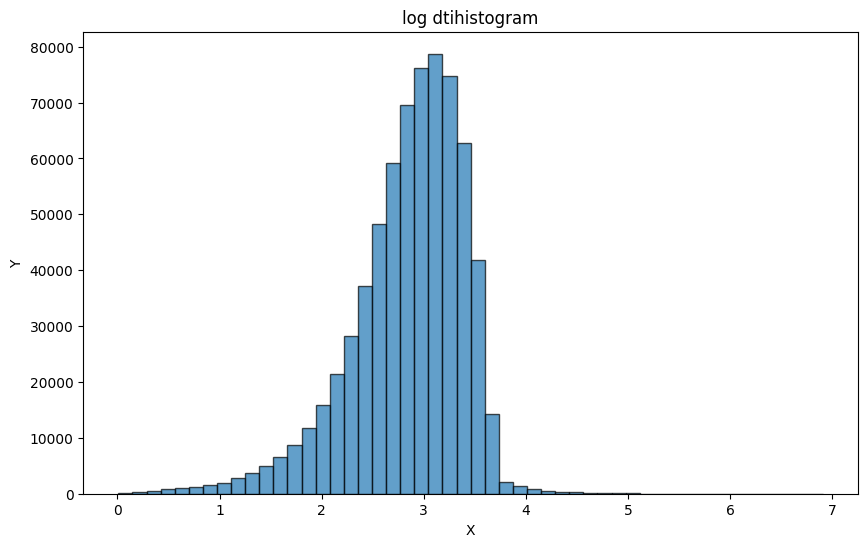

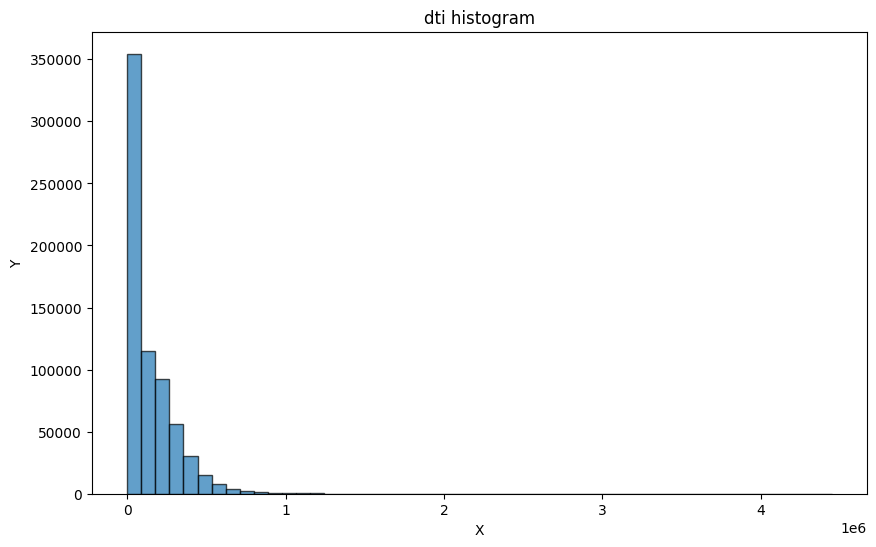

In [44]:
# 연속형 변수 로그 히스토그램
# 0 이하 값을 제거한 후 연간 소득에 대해 np.log 변환
feature = "dti"

df_positive = df[df[feature] > 0].copy()
df_positive['log_income'] = np.log1p(df_positive[feature])

plt.figure(figsize=(10, 6))
plt.hist(df_positive['log_income'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('log {}histogram'.format(feature))
# plt.yscale('log')  # y축 로그 스케일 적용
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_positive['tot_cur_bal'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('{} histogram'.format(feature))
# plt.yscale('log')  # y축 로그 스케일 적용
plt.show()


In [35]:
import pandas as pd

df = pd.read_csv("./data/lending_club_2020_test.csv", low_memory=False)

In [36]:
import numpy as np
import pandas as pd

In [37]:
from sklearn.preprocessing import LabelEncoder

df = df.drop(columns=["id",
                      "url",
                      "title",
                      "application_type",
                      "next_pymnt_d",
                      "policy_code",
                      "delinq_amnt",
                      "hardship_flag"])

grade = np.array(df["grade"])
sub_grade = np.array(df["sub_grade"])

encoder = LabelEncoder()
grade_encoded = encoder.fit_transform(grade)
sub_grade_encoded = encoder.fit_transform(sub_grade)

df["grade"] = grade_encoded
df["sub_grade"] = sub_grade_encoded

# 50% 이상 결측치를 가지는 칼럼 drop
df = df.loc[:, (df.isnull().mean() < 0.5) | (df.columns == "loan_status")]
df["int_rate"] = df["int_rate"].str.rstrip("%").astype(float) / 100

# fico_range_low
# data cleansing. add avg fico score column 
insert_loc = df.columns.get_loc('fico_range_low')
df.insert(insert_loc, 'fico_avg', (df['fico_range_low'] + df['fico_range_high']) / 2)

# emp_length
# 2 way of emp_length mapping.
# emp_length이 NaN인 값(무직)을 -1로 매핑, 나머지를 오름차순으로 0~10
# emp_length이 NaN인 값(무직)을 -1로 매핑, 나머지를 오름차순으로 1~11. 무직과 고용상태를 구분하기 위함
label_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}

df['emp_length'] = df['emp_length'].map(label_mapping)
df['emp_length'] = df['emp_length'].fillna(-1)

# term
# categorical variable Labeling
label_mapping = {
    ' 36 months': 36,
    ' 60 months': 60
}

df['term'] = df['term'].map(label_mapping)

# revol_util
# follow paper (Machine learning and artificial neural networks to construct P2P lending credit-scoring model: A case using Lending Club data), form change percentage form to decimal form
# 결측치는 평균값으로 채워넣는다
df["revol_util"] = df["revol_util"].str.rstrip("%").astype(float) / 100

# loan_status : 부도 여부, 타겟 변수
# 칼럼 값이 "Fully Paid"가 아닌 값들은 다 default로 판별
# non-default = 0, default = 1
# 'Fully Paid'와 'Charged Off'가 아닌 행 제거
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
df['loan_status'] = np.where(df['loan_status'] == 'Fully Paid', 0, 1)

# Qualitative var labeling(nominal var. without ordinal var)
df = pd.get_dummies(df, columns=["home_ownership", "verification_status"], drop_first=True)

# Data cleansing v5
# 채무불이행 이후에 발생하는 데이터를 가진 칼럼 삭제
df = df.drop(columns=["recoveries", "collection_recovery_fee", "collections_12_mths_ex_med", "tot_coll_amt", ])
df = df.dropna(subset=["loan_status"])

df = df.drop(columns=["zip_code",
                      "fico_range_low",
                      "fico_range_high",
                      "emp_title",
                      "mo_sin_old_il_acct",
                      "mo_sin_old_rev_tl_op",
                      "mths_since_recent_bc",
                      "mths_since_recent_inq",
                      "issue_d",
                      "purpose",
                      "addr_state",
                      "earliest_cr_line",
                      "initial_list_status",
                      "last_credit_pull_d",
                      "debt_settlement_flag",
                      "mo_sin_rcnt_rev_tl_op",
                      "mo_sin_rcnt_tl",
                      "last_pymnt_d",
                      "last_pymnt_amnt",
                      "pymnt_plan",
                      "total_rec_prncp",
                      "total_rec_int",
                      "total_pymnt",
                      "total_pymnt_inv"
                      ])

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,20000.0,20000.0,20000.0,36,0.0603,608.72,0,0,6.0,125000.0,...,37905.0,49000.0,46184.0,True,False,False,False,False,True,False
3,12000.0,12000.0,12000.0,60,0.1464,283.22,2,12,0.0,60000.0,...,14331.0,11400.0,5439.0,False,False,False,False,True,True,False
6,15000.0,15000.0,15000.0,36,0.0532,451.73,0,0,1.0,75000.0,...,19363.0,17400.0,18876.0,True,False,False,False,False,False,False
7,20000.0,20000.0,20000.0,36,0.1305,674.37,1,9,1.0,87500.0,...,57213.0,25900.0,56573.0,False,False,False,True,False,False,True
10,11150.0,11150.0,11150.0,36,0.1399,381.03,2,13,3.0,63498.0,...,177694.0,27500.0,140853.0,False,False,False,False,True,True,False


In [38]:
# 각 컬럼의 결측치 개수 계산
missing_counts = df.isnull().sum()

# 결측치가 있는 컬럼만 선택
missing_counts = missing_counts[missing_counts > 0]

# 결측치 비율 계산 (전체 행 수에 대한 비율)
missing_ratios = missing_counts / len(df)

# 결측치 개수와 비율을 하나의 DataFrame으로 생성한 후, 내림차순 정렬
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Ratio': missing_ratios
}).sort_values(by='Missing Count', ascending=False)

missing_df

,Missing Count,Missing Ratio
il_util,395225,0.530900
mths_since_rcnt_il,350148,0.470349
all_util,338649,0.454903
open_acc_6m,338593,0.454827
inq_last_12m,338593,0.454827
total_cu_tl,338593,0.454827
open_il_24m,338592,0.454826
total_bal_il,338592,0.454826
open_rv_12m,338592,0.454826
open_rv_24m,338592,0.454826


In [39]:
# 40% 이상 결측치를 가지는 칼럼 drop
df = df.loc[:, (df.isnull().mean() < 0.4) | (df.columns == "loan_status")]

df.info()
# 현재 칼럼 수 : 48개
print("현재 행 개수:", df.shape[0])
# 현재 행 수 : 1115888개

<class 'pandas.core.frame.DataFrame'>
Index: 744443 entries, 0 to 1170196
Data columns (total 63 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            744443 non-null  float64
 1   funded_amnt                          744443 non-null  float64
 2   funded_amnt_inv                      744443 non-null  float64
 3   term                                 744443 non-null  int64  
 4   int_rate                             744443 non-null  float64
 5   installment                          744443 non-null  float64
 6   grade                                744443 non-null  int64  
 7   sub_grade                            744443 non-null  int64  
 8   emp_length                           744443 non-null  float64
 9   annual_inc                           744443 non-null  float64
 10  loan_status                          744443 non-null  int64  
 11  dti              

In [21]:
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer
# from tqdm import tqdm
# 
# # 예시: df는 원본 데이터프레임
# # 데이터를 청크로 나누기 (여기서는 10개 청크로 나눕니다)
# n_chunks = 100
# chunk_size = int(np.ceil(len(df) / n_chunks))
# imputer = KNNImputer(n_neighbors=3)
# imputed_chunks = []
# 
# for i in tqdm(range(n_chunks), desc="Imputing chunks"):
#     chunk = df.iloc[i*chunk_size : (i+1)*chunk_size]
#     imputed_chunk = pd.DataFrame(imputer.fit_transform(chunk),
#                                  columns=chunk.columns,
#                                  index=chunk.index)
#     imputed_chunks.append(imputed_chunk)
# 
# # 청크들을 다시 합칩니다.
# df_imputed = pd.concat(imputed_chunks).sort_index()
# 
# print("\nKNN Imputation 후 데이터 일부:")
# df_imputed.head()


Imputing chunks: 100%|██████████| 100/100 [01:44<00:00,  1.04s/it]


KNN Imputation 후 데이터 일부:


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,20000.0,20000.0,20000.0,36.0,0.0603,608.72,0.0,0.0,6.0,125000.0,...,37905.0,49000.0,46184.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,12000.0,12000.0,12000.0,60.0,0.1464,283.22,2.0,12.0,0.0,60000.0,...,14331.0,11400.0,5439.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,15000.0,15000.0,15000.0,36.0,0.0532,451.73,0.0,0.0,1.0,75000.0,...,19363.0,17400.0,18876.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,20000.0,20000.0,20000.0,36.0,0.1305,674.37,1.0,9.0,1.0,87500.0,...,57213.0,25900.0,56573.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10,11150.0,11150.0,11150.0,36.0,0.1399,381.03,2.0,13.0,3.0,63498.0,...,177694.0,27500.0,140853.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [40]:
# 결측치가 있는 행 모두 제거 (원본 df에 바로 적용)
df.dropna(inplace=True)


In [47]:
# dti 값이 -1 또는 0.0인 행들을 제거합니다.
df = df[(df['dti'] != -1) & (df['dti'] != 0.0)]

# 제거 후 결과 확인
print("제거 후 df shape:", df.shape)


제거 후 df shape: (680570, 63)


In [48]:
df["dti"].value_counts()

dti
19.20     484
14.40     473
16.80     464
12.00     463
13.20     461
         ... 
181.83      1
56.65       1
74.83       1
60.34       1
84.33       1
Name: count, Length: 7213, dtype: int64

In [52]:
import joblib
import pandas as pd
import xgboost as xgb

# 모델 로드
model_int_rate = joblib.load('./model/int_rate_pred_ridge.pkl')
model_recovery_rate = joblib.load('./model/recovery_pred_ridge.pkl')
model_loan_status = joblib.load('./model/loan_status_prop.pkl')

# 모델3이 dict로 저장된 경우, 내부 모델 추출
if isinstance(model_loan_status, dict):
    loan_status_model = model_loan_status["model"]
else:
    loan_status_model = model_loan_status

# 데이터 로드 및 불필요한 타겟 컬럼 제거
df1 = pd.read_csv("./data/sec_timeline_scaled.csv")
df1 = df1.drop(columns=["int_rate"])  # df1: sec 데이터 (모델1, 모델2 예측 대상)
df3 = pd.read_csv("./data/trd_timeline_scaled.csv")
df3 = df3.drop(columns=["loan_status"])  # df3: trd 데이터 (모델3 예측 대상)

# --- 공통 식별자 생성: dti, loan_amnt, annual_inc ---
def create_merge_key(df):
    # 문자열로 변환 후 '_'로 연결하여 merge key 생성
    return df['dti'].astype(str) + "_" + df['loan_amnt'].astype(str) + "_" + df['annual_inc'].astype(str)

# df1와 df3에 merge_key 추가 (df2도 후에 생성할 예정)
df1['merge_key'] = create_merge_key(df1)
df3['merge_key'] = create_merge_key(df3)

# =============================================================================
# 1. 모델1: df1을 넣어 int_rate 예측 후 보관
# =============================================================================
df1_out = df1.copy()  # 원본 보호
# 모델1 학습 시 사용했던 피처 목록 추출
feature_list_model1 = list(model_int_rate.feature_names_in_)
# df1에서 모델1에 필요한 피처만 선택
df1_model1 = df1[feature_list_model1]
# 예측 (회귀 모델) 후 'int_rate' 칼럼 추가
df1_out['int_rate'] = model_int_rate.predict(df1_model1)
# 예측된 int_rate 칼럼 보관 (merge_key 포함)
int_rate_pred_df = df1_out[['merge_key', 'int_rate']]

# =============================================================================
# 2. 모델2: df2 생성 - 모델1의 int_rate를 포함하여 recovery_rate 예측 후 보관
# =============================================================================
df2 = df1.copy()
# 모델1 예측 결과 int_rate를 df2에 추가 (모델2의 피처로 사용)
df2 = df2.merge(int_rate_pred_df, on='merge_key', how='left')
# 모델2 학습 시 사용했던 피처 목록 추출
feature_list_model2 = list(model_recovery_rate.feature_names_in_)
# df2에서 모델2에 필요한 피처만 선택
df2_model2 = df2[feature_list_model2]
# 예측 (회귀 모델) 후 'recovery_rate' 칼럼 추가
df2['recovery_rate'] = model_recovery_rate.predict(df2_model2)
# 예측된 recovery_rate 칼럼 보관 (merge_key 포함)
recovery_rate_pred_df = df2[['merge_key', 'recovery_rate']]

# =============================================================================
# 3. 모델3: df3을 넣어 부도율(loan_status, def_prob_pred) 예측
# =============================================================================
df3_out = df3.copy()
# XGBoost 모델은 DataFrame 대신 DMatrix를 입력으로 받음
dmat = xgb.DMatrix(df3.drop(columns=["merge_key"]))

# 예측: def_prob_pred (클래스 1 확률)
def_prob = loan_status_model.predict(dmat)
df3_out['def_prob_pred'] = def_prob
# 임계치 0.5를 기준으로 loan_status 생성 (이진 분류)
df3_out['loan_status'] = (def_prob > 0.5).astype(int)

# =============================================================================
# 4. df3에 보관한 두 칼럼(int_rate, recovery_rate) merge (merge_key 기준)
# =============================================================================
df3_out = df3_out.merge(int_rate_pred_df, on='merge_key', how='left')
df3_out = df3_out.merge(recovery_rate_pred_df, on='merge_key', how='left')

# 선택적으로 merge_key 컬럼 제거
df3_out = df3_out.drop(columns=['merge_key'])

print(df3_out.head())


   loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate_x  installment  \
0   0.566905     0.566905         0.820983   0.0    0.114315     0.582997   
1   0.875639     0.875639         0.948596   1.0    0.785130     0.825244   
2   0.790812     0.790812         0.913534   0.0    0.075955     0.765010   
3   0.501238     0.501238         0.793840   0.0    0.217141     0.535746   
4   0.841755     0.841755         0.934591   0.0    0.199260     0.815130   

      grade  sub_grade  emp_length  annual_inc  ...  home_ownership_NONE  \
0  0.000000   0.117647    0.272727    0.578659  ...                  0.0   
1  0.666667   0.676471    1.000000    0.626931  ...                  0.0   
2  0.000000   0.029412    0.000000    0.598518  ...                  0.0   
3  0.166667   0.205882    0.545455    0.584349  ...                  0.0   
4  0.166667   0.205882    1.000000    0.594195  ...                  0.0   

   home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  \
0           

In [50]:
df.to_csv("./data/test_trd_timeline_scaled.csv", index=False)
